### Exploring the GPy package



In [1]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
n = 10
np.random.seed(int(time.time()))
t = np.random.rand(n)
x = np.random.rand(n)
y_u = np.multiply(np.exp(-t), np.sin(2*np.pi*x))
y_f = (4*np.pi**2 - 1) * np.multiply(np.exp(-t), np.sin(2*np.pi*x))

In [3]:
import GPy

In [4]:
kernel = GPy.kern.RBF(input_dim=2)
kernel

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,1.0,+ve,


In [5]:
m = GPy.models.GPRegression(np.matrix([t, x]).T, y_u.reshape(y_u.size,1),kernel)

In [6]:
from IPython.display import display
display(m)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


 /usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


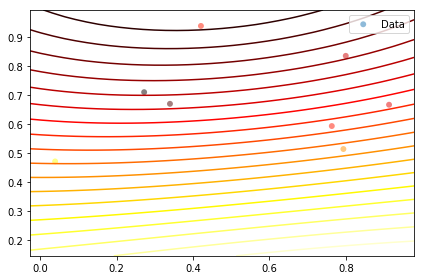

In [7]:
fig = m.plot()
display(GPy.plotting.show(fig, filename='basic_gp_regression_notebook_2d'))

In [8]:
m.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0003   1.797920e+01   3.159042e+02 
    00s03  0012   3.656938e+00   9.295373e+00 
    00s06  0023   6.417812e-01   7.386639e-03 
    00s09  0035   6.255299e-01   4.347322e-06 
    00s10  0040   6.255208e-01   1.657704e-08 
    00s12  0045   6.255205e-01   6.876193e-11 
    00s12  0046   6.255205e-01   6.876193e-11 
Runtime:     00s12
Optimization status: Converged



In [9]:
m.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = 0.6255204911801915
Optimization restart 2/10, f = 0.6255204901419562
Optimization restart 3/10, f = 0.6255214894302625
Optimization restart 4/10, f = 0.6255204755438637
Optimization restart 5/10, f = 0.625520537160762
Optimization restart 6/10, f = 0.6255204592848189
Optimization restart 7/10, f = 0.6255204754204922
Optimization restart 8/10, f = 0.6255213104151442
Optimization restart 9/10, f = 0.6255213338652572
Optimization restart 10/10, f = 0.6255205894920346


In [10]:
display(m)

GP_regression.,value,constraints,priors
rbf.variance,0.15041095424439307,+ve,
rbf.lengthscale,0.23136896502224594,+ve,
Gaussian_noise.variance,3.0641250798197575e-11,+ve,


 /usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


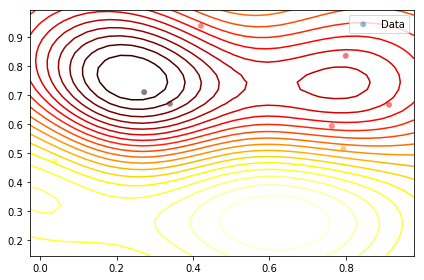

In [11]:
fig = m.plot()
GPy.plotting.show(fig, filename='basic_gp_regression_notebook_optimized')